# Resistance plant gene prediction - EDA

## Libraries

In [56]:
# Data manipulation
import pandas as pd
import numpy as np
from collections import Counter

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Parameters 
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

## Data Loading

In [2]:
molecules = pd.read_csv('Data/train.csv')

In [3]:
molecules.sample(6)

,ID,Sequence,Label
12225,16330,MGSCCSRATSPDSGRGGANGYGYSHQTKPAQTTPSYNHPQPPPPAE...,0
6156,8242,MASAAASAVSFARPVKAICVNSVSFSALRKDNVSFRLQPVPQRFSV...,0
10931,14646,NTDITSNGERVKCMQVWPPIGKKKFETLSYLPPLTRDQLLKEVEYL...,0
3341,4472,MSIYLRWSLEHGKSNSNSNGIINQQDERFNIFKDNLRFIDLHNENN...,0
7051,9426,MATKSTGGTEKTKSIEVKKKLINVLIVDDDPLNRRLHEMIIKTIGG...,0
10542,14121,MDAAALQYENQKLVQQLEAQKSKMRALEGKFKELRDEQCSYDNTLI...,1


In [4]:
molecules.iloc[0, 1]

'MDSRMDQYEVMEQIGRGAFGAAILVNHKTEKKKYVLKKIRLARQTERCRKSAHQEMALIARLQHPYIVEFKEAWVEKGCYVCIVTGYCEGGDMAELMKKANGTYFPEEKLLKWFAQLALAVDYLHSNFVLHRDLKCSNIFLTKDQDIRLGDFGLAKTLKADDLTSSVVGTPNYMCPELLADIPYGFKSDIWSLGCCMYEMAAHRPAFKAFDMAGLISKINRSSIGPLPPCYSPSMKSLIKSMLRKSPEHRPTASEILKSPYLQPYVNQYRPFADISHPIHSLEKPITSSRSSQKSMSGSQCSSISGSDIDSIQSSERNTSGPSTSSNNTIDTEGAEATDHVSVKNCSRSDDVKSNKETVGPELERQDSSKSIHVDQRPRNEIKQPKIIKKILTTLREESKLRQNNSPIRASRVKLNSPSNREQLSDDSKHSSDISSSSKSSEVTSRESAKVICEPVKRAQASPPLKHLSPIVEHSPKAKIKQDEPLQPDPAKQAMEDVDAAVGKVKNRTPPSYSRRLSIPPRRPLGAESPLHADTKRAHNKVIKERAKSPCRPVHGPDNDIIEPPGFPMAPPSPLGGVQMKVGNARAKSAPPRAVSIKEDSSDCSSSTIAYAENTELSEPSKQDSSAQLVSSCKCSIPDAAIQKHDLTAMPSSELNTTNFQKSMASNDDVCENLALEPSSDISEQVSIFKDNVPCSKISQSTANAIVQNDEDKFTVQELLSSVADIAPFVSTKNFALEKGSPPIQSLERTSSPHLNPPIEDVIHVIRHSSFRVCGEQAVAENAEMGVQSSDVGKLLNVVREEVDSRSIPSNNLVPHRLPDCAAPKPNISETNTISSKTACSDVVKFLTVPEVNSTTTAINNGFKEEASPTKEILDVKSFRQRAEALEGLLELSADLLQHNRLEELAVVLKPFGKDKVSPRETAIWLAKSFKGMMNDEASRSSM'

## Exploratory data analysis (EDA)

In [5]:
molecules.describe()

,ID,Label
count,14161.000000,14161.000000
mean,9469.114116,0.089965
std,5461.636271,0.286142
min,0.000000,0.000000
25%,4732.000000,0.000000
50%,9471.000000,0.000000
75%,14222.000000,0.000000
max,18881.000000,1.000000


In [6]:
molecules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14161 entries, 0 to 14160
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        14161 non-null  int64 
 1   Sequence  14161 non-null  object
 2   Label     14161 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 332.0+ KB


In [7]:
molecules.isna().sum()

ID          0
Sequence    0
Label       0
dtype: int64

In [8]:
aminos = []
for sequence in molecules.Sequence:
    amino_counter = Counter(sequence)
    aminos.append([len(amino_counter), amino_counter])

In [9]:
aminos[:2]

[[20,
  Counter({'S': 123,
           'K': 75,
           'A': 71,
           'L': 68,
           'P': 68,
           'E': 66,
           'V': 56,
           'I': 55,
           'D': 53,
           'R': 48,
           'N': 42,
           'T': 39,
           'Q': 35,
           'G': 35,
           'F': 23,
           'H': 23,
           'M': 22,
           'C': 21,
           'Y': 16,
           'W': 4})],
 [18,
  Counter({'K': 30,
           'A': 19,
           'E': 15,
           'G': 11,
           'S': 11,
           'P': 9,
           'I': 9,
           'L': 7,
           'V': 7,
           'T': 7,
           'R': 6,
           'F': 4,
           'M': 3,
           'Y': 3,
           'N': 3,
           'Q': 2,
           'H': 2,
           'D': 2})]]

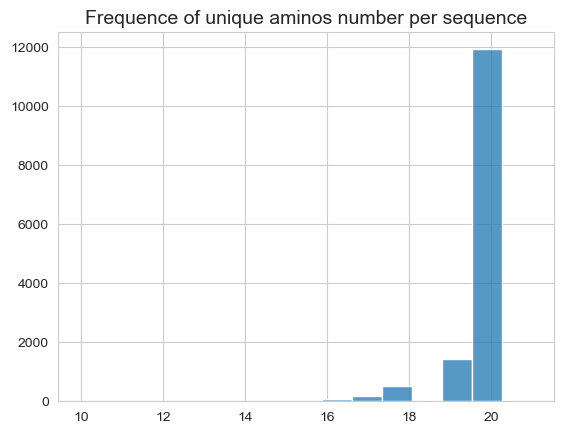

In [10]:
sns.histplot([row[0] for row in aminos])

plt.title('Frequence of unique aminos number per sequence', fontsize=14)
plt.ylabel(None)
plt.savefig('Figures/No_unique_aminos_per_sequence.png')
plt.show()

In [11]:
aminos_variance = pd.DataFrame([row[1] for row in aminos]).fillna(0).astype(int)
aminos_variance

,M,D,S,R,Q,Y,E,V,I,G,A,F,L,N,H,K,T,C,P,W,X,Z,B
0,22,53,123,48,35,16,66,56,55,35,71,23,68,42,23,75,39,21,68,4,0,0,0
1,3,2,11,6,2,3,15,7,9,11,19,4,7,3,2,30,7,0,9,0,0,0,0
2,2,2,7,5,3,1,3,7,3,5,3,5,12,6,3,5,3,1,4,1,0,0,0
3,10,9,27,6,13,15,12,31,19,22,22,23,41,13,5,22,24,10,15,5,0,0,0
4,9,21,28,20,9,8,19,27,19,43,41,8,32,11,10,17,10,6,11,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14156,4,4,7,2,2,3,12,5,2,5,9,3,9,3,1,11,5,0,3,2,0,0,0
14157,10,23,42,30,7,13,21,26,6,36,41,12,26,5,7,12,19,10,34,6,0,0,0
14158,4,21,26,19,12,11,23,14,8,26,10,12,15,19,16,21,14,11,16,4,0,0,0
14159,16,32,45,38,16,14,23,51,23,46,55,25,44,12,8,15,22,6,25,8,0,0,0


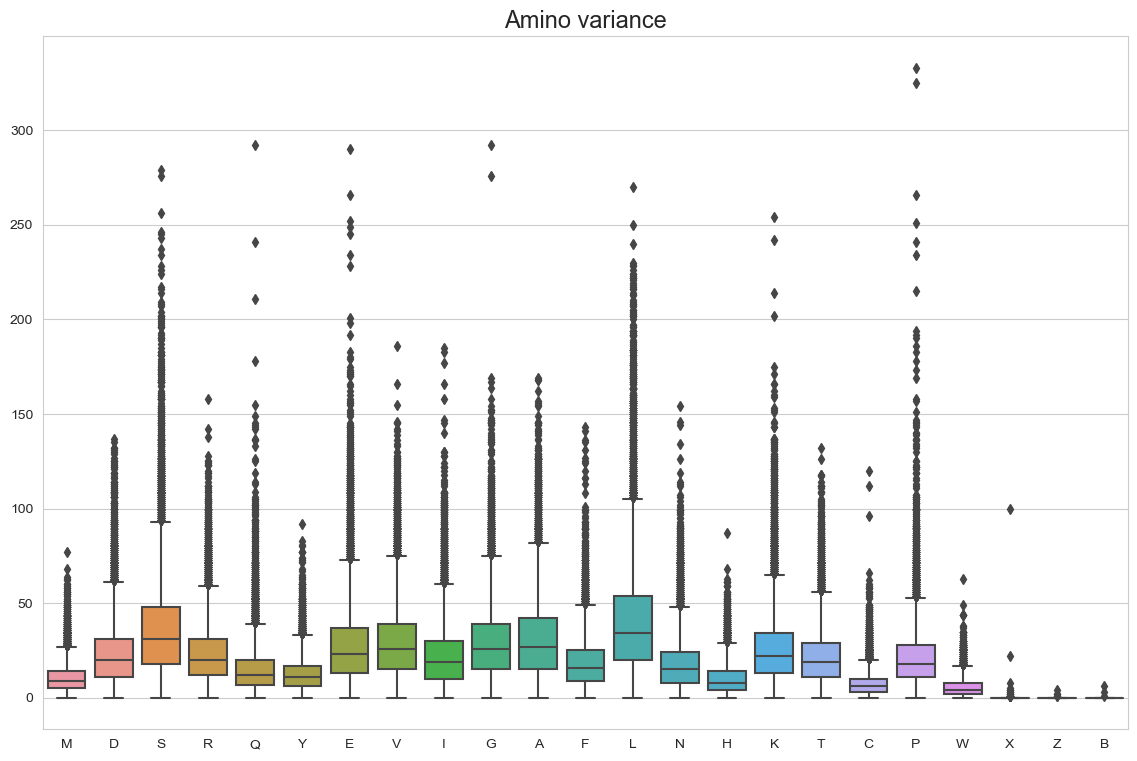

In [12]:
plt.figure(figsize=(14, 9))

sns.boxplot(aminos_variance)

plt.title('Amino variance', fontsize=17)
plt.savefig('Figures/Amino_variance.png')
plt.show()